<a href="https://colab.research.google.com/github/DhanashriDNair/POCs/blob/master/Prediction_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
###### Prediction & Forecasting

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #### data visualization 
import plotly.express as plotly  #### plotting the data on world map

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = "https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv"

In [0]:
df = pd.read_csv(path,parse_dates=["Date"])
df.drop(["Province/State"],axis=1,inplace=True)
df.rename(columns={"Country/Region":"Country"},inplace=True)
df["Active"] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    28248 non-null  object        
 1   Lat        28248 non-null  float64       
 2   Long       28248 non-null  float64       
 3   Date       28248 non-null  datetime64[ns]
 4   Confirmed  28248 non-null  int64         
 5   Deaths     28248 non-null  int64         
 6   Recovered  28248 non-null  int64         
 7   Active     28248 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.7+ MB


In [0]:
from fbprophet import Prophet

In [0]:
### Forcast for Confirmed Cases
df.tail()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
28243,Western Sahara,24.215500,-12.885800,2020-05-07,6,0,5,1
28244,Sao Tome and Principe,0.186360,6.613081,2020-05-07,187,4,4,179
28245,Yemen,15.552727,48.516388,2020-05-07,25,5,1,19
28246,Comoros,-11.645500,43.333300,2020-05-07,8,1,0,7
28247,Tajikistan,38.861034,71.276093,2020-05-07,461,12,0,449


In [0]:
confirmed= df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [0]:
len(confirmed)

107

In [0]:
###Build the model
model = Prophet(interval_width=0.95)

In [0]:
confirmed.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

In [0]:
### Train the model
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
### Create future dates
future_dates=model.make_future_dataframe(periods=7)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
109,2020-05-10
110,2020-05-11
111,2020-05-12
112,2020-05-13


In [0]:
forecast = model.predict(future_dates)

In [0]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
##ds -date
## yhat - predicted value
##yhat _lower=lower range prediction
## yhat_upper =upper range of prediction

,ds,yhat,yhat_lower,yhat_upper
109,2020-05-10,4.070781e+06,4.053555e+06,4.090331e+06
110,2020-05-11,4.146160e+06,4.123355e+06,4.176075e+06
111,2020-05-12,4.223345e+06,4.191979e+06,4.261553e+06
112,2020-05-13,4.303767e+06,4.259565e+06,4.354600e+06
113,2020-05-14,4.388152e+06,4.336298e+06,4.451030e+06


In [0]:
confirmed.tail(7)

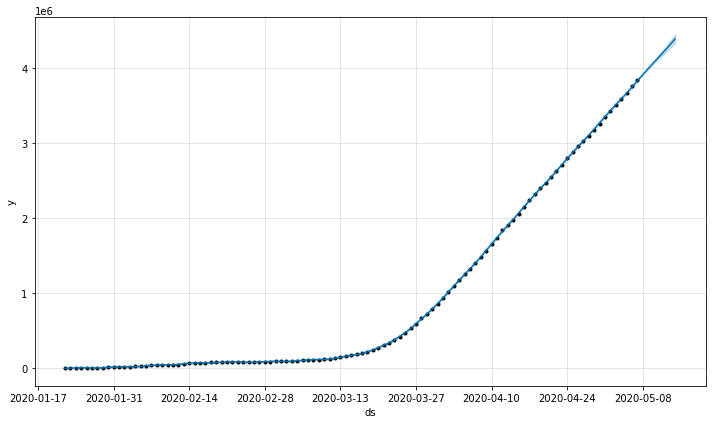

In [0]:
confirmed_plot=model.plot(forecast)

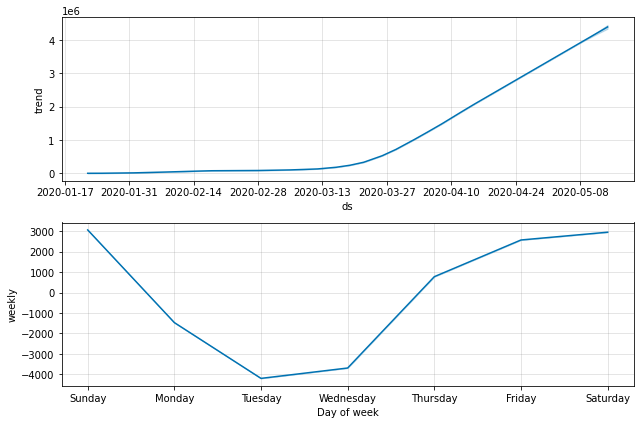

In [0]:
weekly = model.plot_components(forecast)

In [0]:
###india
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [0]:
india = df[df['Country']=='India']
india.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
131,India,21.0,78.0,2020-01-22,0,0,0,0
395,India,21.0,78.0,2020-01-23,0,0,0,0
659,India,21.0,78.0,2020-01-24,0,0,0,0
923,India,21.0,78.0,2020-01-25,0,0,0,0
1187,India,21.0,78.0,2020-01-26,0,0,0,0


In [0]:
confirmed = india.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [0]:
#### Build the model
model = Prophet(interval_width=0.95)

In [0]:
confirmed.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)
confirmed.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [0]:
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=15)

In [0]:
forecast = model.predict(future)

In [0]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)
### ds - date
### yhat - predicted value
### yhat_lower = lower range of prediction
### yhat_upper = upper range of prediction

,ds,yhat,yhat_lower,yhat_upper
112,2020-05-13,60579.432999,57941.592278,62823.669331
113,2020-05-14,62436.025342,59900.964783,64922.248525
114,2020-05-15,63738.829985,61124.876492,66003.233993
115,2020-05-16,65548.112158,62600.703536,68154.066894
116,2020-05-17,67394.331314,64305.454970,70278.075588
117,2020-05-18,69300.260476,66335.971432,71925.439379
118,2020-05-19,71137.035446,67741.245542,74034.432822
119,2020-05-20,73016.425936,69359.192910,76118.439144
120,2020-05-21,74873.018279,70999.736032,78587.222139
121,2020-05-22,76175.822922,71900.536271,79654.587330


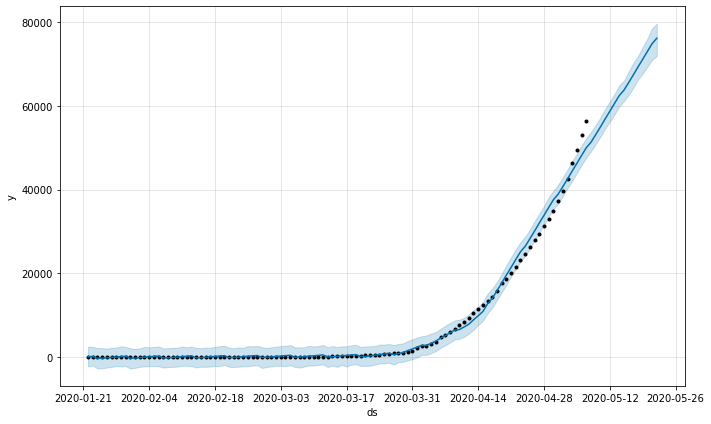

In [0]:
plot = model.plot(forecast)

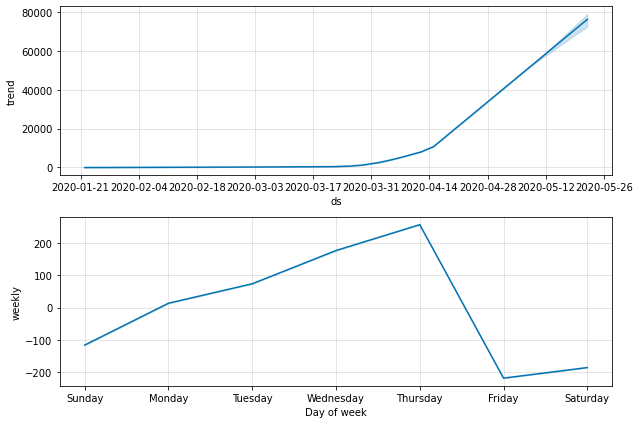

In [0]:
week = model.plot_components(forecast)

In [0]:
forecast.to_csv("forecast.csv")